In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
import tqdm
from time import sleep
import time
from PIL import Image
from io import BytesIO
from adjustText import adjust_text


In [2]:
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.teams import find_teams_by_full_name, get_teams, find_team_name_by_id
from nba_api.stats.endpoints.playbyplayv2 import PlayByPlayV2
from nba_api.stats.endpoints.leaguegamefinder import LeagueGameFinder
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail

## ALL Shots

In [5]:
shots = ShotChartDetail(team_id=0, player_id=0, context_measure_simple='FGM', season_nullable='2019-20')

In [6]:
shots_df = shots.get_data_frames()[0]

## Assists analysis

In [5]:
teams = get_teams()

In [11]:
game_finder = LeagueGameFinder(league_id_nullable="00", season_type_nullable="Regular Season", season_nullable='2019-20')

games = game_finder.get_data_frames()[0]
#PlayByPlayV2(game_id=0)

In [12]:
target_dir = 'team_play_by_play'

In [13]:
teams[0]

{'id': 1610612737,
 'full_name': 'Atlanta Hawks',
 'abbreviation': 'ATL',
 'nickname': 'Hawks',
 'city': 'Atlanta',
 'state': 'Atlanta',
 'year_founded': 1949}

In [14]:
a = ['1', '2']

In [15]:
teams[11]

{'id': 1610612748,
 'full_name': 'Miami Heat',
 'abbreviation': 'MIA',
 'nickname': 'Heat',
 'city': 'Miami',
 'state': 'Florida',
 'year_founded': 1988}

In [75]:
all_data_frames = []
for team in teams:
    cur_season_games = games.loc[(games.TEAM_ID == team['id']) & (games.SEASON_ID == "22019")]
    cur_team_dfs = []
    for game_id in tqdm.tqdm(cur_season_games.GAME_ID.unique(), desc=f"Fetching games by {team['full_name']}"):
        pbp = PlayByPlayV2(game_id=game_id)
        cur_team_dfs.append(pbp.get_data_frames()[0])
        time.sleep(0.2)
    df = pd.concat(cur_team_dfs)
    df.to_csv(target_dir + "/" + team['abbreviation'] + '.csv')
    all_data_frames.append(df)

Fetching games by Charlotte Hornets: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 65/65 [00:49<00:00,  1.31it/s]


In [76]:
full_pbp = pd.concat(all_data_frames)

In [77]:
dropped_full = full_pbp.drop_duplicates()

In [78]:
dropped_full.to_csv('play_by_plays/full_pbp_2019_20_dropped.csv')

In [79]:
full_pbp.to_csv('play_by_plays/full_pbp_2019_20.csv')

In [26]:
lal_df = pd.read_csv('team_play_by_play/LAL.csv')

In [29]:
lebron_id = find_players_by_full_name("LeBron James")[0]['id']

In [36]:
lebron_assists = lal_df.loc[(lal_df.PLAYER2_ID == lebron_id) & (lal_df.EVENTMSGTYPE == 1)]

In [37]:
lebron_assists.head()

,Unnamed: 0,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,...,PLAYER2_TEAM_NICKNAME,PLAYER2_TEAM_ABBREVIATION,PERSON3TYPE,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ID,PLAYER3_TEAM_CITY,PLAYER3_TEAM_NICKNAME,PLAYER3_TEAM_ABBREVIATION,VIDEO_AVAILABLE_FLAG
10,10,21901310,15,1,1,1,1:42 PM,10:59,Horton-Tucker 24' 3PT Jump Shot (3 PTS) (James...,NaN,...,Lakers,LAL,0,0,NaN,NaN,NaN,NaN,NaN,1
20,20,21901310,31,1,1,1,1:45 PM,9:24,Morris 25' 3PT Jump Shot (6 PTS) (James 2 AST),NaN,...,Lakers,LAL,0,0,NaN,NaN,NaN,NaN,NaN,1
42,42,21901310,60,1,1,1,1:51 PM,6:52,Morris 25' 3PT Jump Shot (9 PTS) (James 3 AST),NaN,...,Lakers,LAL,0,0,NaN,NaN,NaN,NaN,NaN,1
62,62,21901310,90,1,79,1,1:54 PM,5:12,Green 12' Pullup Jump Shot (2 PTS) (James 4 AST),NaN,...,Lakers,LAL,0,0,NaN,NaN,NaN,NaN,NaN,1
445,2,21901296,7,1,79,1,9:18 PM,11:43,Davis 3' Pullup Jump Shot (2 PTS) (James 1 AST),NaN,...,Lakers,LAL,0,0,NaN,NaN,NaN,NaN,NaN,1


In [38]:
lebron_assists.loc[:, "GAME_ID_STR"] = ["00" + str(item) for item in lebron_assists.GAME_ID.tolist()]

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [41]:
merged_df = pd.merge(left=shots_df, right=lebron_assists, left_on=("GAME_ID", "GAME_EVENT_ID"), right_on=("GAME_ID_STR", "EVENTNUM"))

In [7]:
fake = [
    'Driving Dunk Shot',
    'Driving Finger Roll Layup Shot',
    'Driving Floating Bank Jump Shot',
    'Driving Floating Jump Shot',
    'Driving Hook Shot',
    'Driving Layup Shot',
    'Fadeaway Jump Shot',
    'Floating Jump shot',
    'Pullup Jump shot',
    'Step Back Jump shot',
    'Turnaround Fadeaway Bank Jump Shot',
    'Turnaround Hook Shot',
    'Turnaround Jump Shot'
]

real = [
    'Alley Oop Dunk Shot',
    'Alley Oop Layup shot',
    'Cutting Dunk Shot',
    'Cutting Finger Roll Layup Shot',
    'Cutting Layup Shot',
    'Dunk Shot',
    'Jump Bank Shot',
    'Jump Shot',
    'Layup Shot',
    'Hook Shot',
    'Reverse Dunk Shot',
    'Reverse Layup Shot',
    'Running Alley Oop Dunk Shot',
    'Running Alley Oop Layup Shot',
    'Running Dunk Shot',
    'Running Finger Roll Layup Shot',
    'Running Jump Shot',
    'Running Layup Shot',
    'Running Pull-Up Jump Shot',
    'Running Reverse Layup Shot',
]

In [6]:
from collections import defaultdict, Counter

In [49]:
assist_info = Counter()
value_counts = merged_df.ACTION_TYPE.value_counts().to_dict()
for key in value_counts:
    if key in created_shots:
        assist_info['created'] += value_counts[key]
    else:
        assist_info['non_created'] += value_counts[key]


In [50]:
assist_info

Counter({'non_created': 556, 'created': 128})

### Loading all pbp 

In [5]:
import os

In [69]:
pbp_dfs = []
for item in os.listdir('team_play_by_play/'):
    pbp_dfs.append(pd.read_csv('team_play_by_play/' + item))

In [70]:
full_pbp_df = pd.concat(pbp_dfs)

In [72]:
full_pbp_df.loc[:, 'GAME_ID_STR'] = ["00" + str(item) for item in full_pbp_df.GAME_ID.tolist()]

In [29]:
full_pbp_df = full_pbp

In [8]:
dropped_pbp_df = pd.read_csv('play_by_plays/full_pbp_2019_20_dropped.csv')

In [9]:
dropped_pbp_df.loc[:, 'GAME_ID_STR'] = ["00" + str(item) for item in dropped_pbp_df.GAME_ID.tolist()]

### Top assist getters

In [9]:
created_shots = [
    'Driving Dunk Shot',
    'Driving Finger Roll Layup Shot',
    'Driving Floating Bank Jump Shot',
    'Driving Floating Jump Shot',
    'Driving Hook Shot',
    'Driving Layup Shot',
    'Fadeaway Jump Shot',
    'Floating Jump shot',
    'Pullup Jump shot',
    'Step Back Jump shot',
    'Turnaround Fadeaway Bank Jump Shot',
    'Turnaround Hook Shot',
    'Turnaround Jump Shot'
]

non_created = [
    'Alley Oop Dunk Shot',
    'Alley Oop Layup shot',
    'Cutting Dunk Shot',
    'Cutting Finger Roll Layup Shot',
    'Cutting Layup Shot',
    'Dunk Shot',
    'Jump Bank Shot',
    'Jump Shot',
    'Layup Shot',
    'Hook Shot',
    'Reverse Dunk Shot',
    'Reverse Layup Shot',
    'Running Alley Oop Dunk Shot',
    'Running Alley Oop Layup Shot',
    'Running Dunk Shot',
    'Running Finger Roll Layup Shot',
    'Running Jump Shot',
    'Running Layup Shot',
    'Running Pull-Up Jump Shot',
    'Running Reverse Layup Shot',
]

In [10]:
from nba_api.stats.endpoints.leaguedashplayerstats import LeagueDashPlayerStats
from collections import Counter

In [11]:
league_stats = LeagueDashPlayerStats(per_mode_detailed='PerGame', season='2019-20', season_type_all_star='Regular Season')

In [12]:
league_totals = LeagueDashPlayerStats(per_mode_detailed='Totals', season='2019-20', season_type_all_star='Regular Season')

In [13]:
totals_df = league_totals.get_data_frames()[0]

In [14]:
league_df = league_stats.get_data_frames()[0]

In [15]:
top_passers = league_df.loc[league_df.GP > 30].sort_values(by='AST_RANK').iloc[:40]

In [16]:
#dropped_pbp_df = full_pbp_df.drop_duplicates()
#dropped_pbp_df = dropped_full
dropped_pbp_df.loc[:, 'GAME_ID_STR'] = ["00" + str(item) for item in dropped_pbp_df.GAME_ID.tolist()]

In [17]:
player_assist_info = {}
for i in range(len(top_passers)):
    cur_row = top_passers.iloc[i]
    player_assists = dropped_pbp_df.loc[(dropped_pbp_df.PLAYER2_ID == cur_row.PLAYER_ID) & (dropped_pbp_df.EVENTMSGTYPE == 1)]
    merged_df = pd.merge(left=shots_df, right=player_assists, left_on=("GAME_ID", "GAME_EVENT_ID"), right_on=("GAME_ID_STR", "EVENTNUM"))
    assist_info = Counter()
    value_counts = merged_df.ACTION_TYPE.value_counts().to_dict()
    for key in value_counts:
        if key in created_shots:
            assist_info['created'] += value_counts[key]
        else:
            assist_info['non_created'] += value_counts[key]
    player_assist_info[cur_row.PLAYER_ID] = {
        'PLAYER_NAME': cur_row.PLAYER_NAME,
        'CREATED': assist_info['created'],
        'NON_CREATED': assist_info['non_created'],
        'AST_G': cur_row.AST 
    }

In [18]:
created_list = []
real_assists = []
player_names = []
assists_list = []
for player_id in player_assist_info:
    total_assists = player_assist_info[player_id]['CREATED'] + player_assist_info[player_id]['NON_CREATED']
    player_names.append(player_assist_info[player_id]['PLAYER_NAME'])
    created_list.append(round(player_assist_info[player_id]['CREATED'] / total_assists * 100))
    real_assists.append(round(player_assist_info[player_id]['NON_CREATED'] / total_assists * 100))
    assists_list.append(total_assists)

In [196]:
assist_counts = pd.DataFrame(player_assist_info).transpose()

In [197]:
assist_counts

,PLAYER_NAME,CREATED,NON_CREATED,AST_G
2544,LeBron James,128,556,10.2
1629027,Trae Young,100,460,9.3
1629029,Luka Doncic,95,443,8.8
201937,Ricky Rubio,118,452,8.8
203081,Damian Lillard,148,382,8
1627732,Ben Simmons,93,362,8
201935,James Harden,108,404,7.5
1628984,Devonte' Graham,116,355,7.5
200768,Kyle Lowry,80,353,7.5
1629630,Ja Morant,132,356,7.3


In [19]:
assist_df = pd.DataFrame(data={
    'PLAYER_NAME': player_names,
    'CREATED': created_list,
    'REAL': real_assists,
    'AST_G': assists_list
})

In [20]:
assist_df

,PLAYER_NAME,CREATED,REAL,AST_G
0,LeBron James,19,81,684
1,Trae Young,18,82,560
2,Luka Doncic,18,82,538
3,Ricky Rubio,21,79,570
4,Damian Lillard,28,72,530
5,Ben Simmons,20,80,455
6,James Harden,21,79,512
7,Devonte' Graham,25,75,471
8,Kyle Lowry,18,82,433
9,Ja Morant,27,73,488


In [58]:
plt.style.use('fivethirtyeight')

In [59]:
sorted_assist = assist_df.sort_values(by='REAL', ascending=True)

In [60]:
ax_labels = [f"{sorted_assist.iloc[i].PLAYER_NAME} ({sorted_assist.iloc[i].AST_G})" for i in range(len(sorted_assist))]

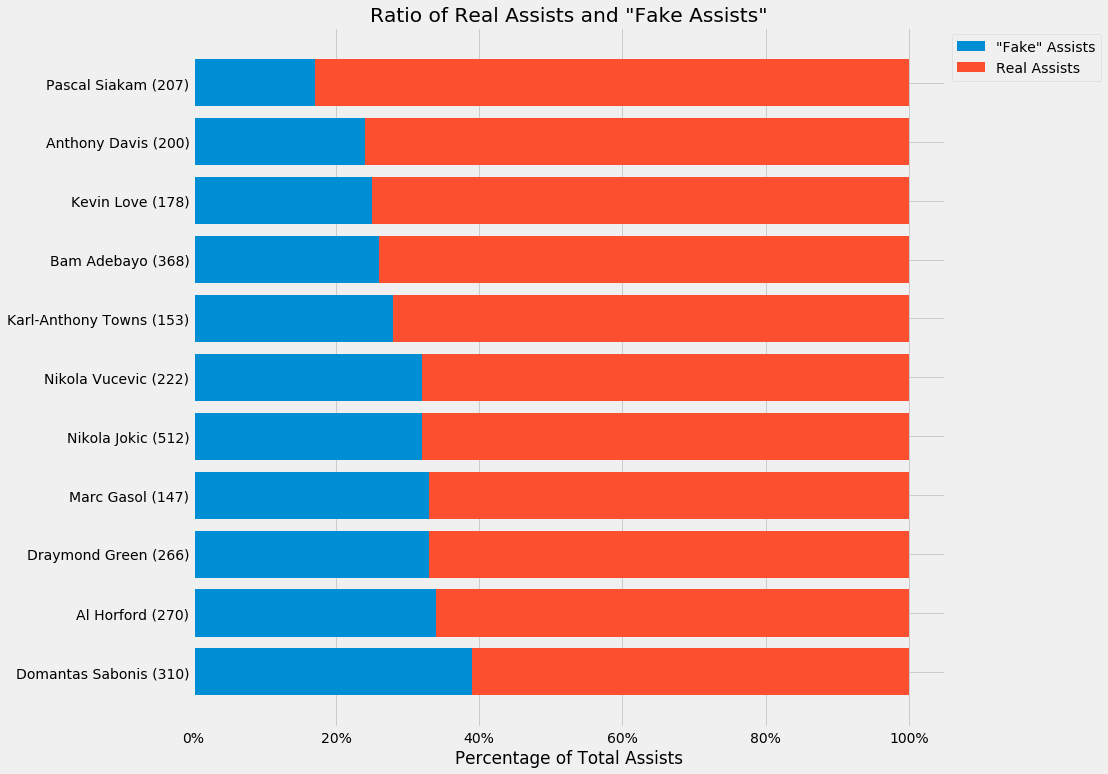

In [62]:
fig, ax = plt.subplots(figsize=(12, 12))


ax.barh(y=ax_labels, width=sorted_assist.CREATED.tolist(), label='"Fake" Assists')
ax.barh(y=ax_labels, width=sorted_assist.REAL.tolist(), left=sorted_assist.CREATED.tolist(), label='Real Assists')
ax.set_title('Ratio of Real Assists and "Fake Assists"')
ax.set_xlabel("Percentage of Total Assists")
#ax.set_xticks([tick for tick in range(0, 110, 20)])
ax.set_xticklabels(f"{item}%" for item in range(0, 105, 20))
#ax.text(x=106, y=17, s='Number in brackets shows\ntotal assists in 2019/20')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

### Check out the fast breaks

In [21]:
fb_pts = ShotChartDetail(team_id=0, player_id=0,season_nullable='2019-20', context_measure_simple='PTS_FB')

In [22]:
fb_df = fb_pts.get_data_frames()[0]

In [23]:
top_passers = league_df.loc[league_df.GP > 30].sort_values(by='AST_RANK').iloc[:100]
player_assist_info = {}
for i in range(len(top_passers)):
    cur_row = top_passers.iloc[i]
    player_assists = dropped_pbp_df.loc[(dropped_pbp_df.PLAYER2_ID == cur_row.PLAYER_ID) & (dropped_pbp_df.EVENTMSGTYPE == 1)]
    merged_df = pd.merge(left=fb_df, right=player_assists, left_on=("GAME_ID", "GAME_EVENT_ID"), right_on=("GAME_ID_STR", "EVENTNUM"))
    assist_info = Counter()
    value_counts = merged_df.ACTION_TYPE.value_counts().to_dict()
    for key in value_counts:
        if key in created_shots:
            assist_info['created'] += value_counts[key]
        else:
            assist_info['non_created'] += value_counts[key]
    player_assist_info[cur_row.PLAYER_ID] = {
        'PLAYER_NAME': cur_row.PLAYER_NAME,
        'CREATED': assist_info['created'],
        'NON_CREATED': assist_info['non_created'],
        'AST_G': cur_row.AST 
    }


In [24]:
created_list = []
fast_break_assists = []
fast_break_assists_pct = []
fb_real_assists = []
fb_fake_assists = []
fb_real_assists_pct = []
fb_fake_assists_pct = []
player_names = []
assists_list = []
normal_pct = []
ast_g_list = []
for player_id in player_assist_info:
    total_assists = totals_df.loc[totals_df.PLAYER_ID == player_id].AST.iloc[0]
    fb_assists = player_assist_info[player_id]['CREATED'] + player_assist_info[player_id]['NON_CREATED']
    fb_real_assists.append(player_assist_info[player_id]['NON_CREATED'])
    fb_fake_assists.append(player_assist_info[player_id]['CREATED'])
    # fb_real_assists_pct.append(player_assist_info[player_id]['NON_CREATED'] / total_assists)
    # fb_fake_assists_pct.append(player_assist_info[player_id]['CREATED'] / total_assists * 100)
    
    player_names.append(player_assist_info[player_id]['PLAYER_NAME'])
    #created_list.append(round(player_assist_info[player_id]['CREATED'] / total_assists * 100))
    #real_assists.append(round(player_assist_info[player_id]['NON_CREATED'] / total_assists * 100))
    fast_break_assists.append(fb_assists)
    fast_break_assists_pct.append(round(fb_assists / total_assists * 100))
    normal_pct.append(100 - (round(fb_assists / total_assists * 100)))
    assists_list.append(total_assists)
    ast_g_list.append(player_assist_info[player_id]['AST_G'])

In [25]:
assist_df = pd.DataFrame(data={
    'PLAYER_NAME': player_names,
    #'CREATED': created_list,
    #'REAL': real_assists,
    'FB_AST': fast_break_assists,
    'FB_AST_PCT': fast_break_assists_pct,
    'FB_REAL': fb_real_assists,
    'FB_FAKE': fb_fake_assists,
    'OTHER_AST_PCT': normal_pct,
    'AST': assists_list,
    'AST_G': ast_g_list
})

In [26]:
assist_df = assist_df.sort_values(by='AST_G', ascending=False)

In [27]:
plt.style.use('fivethirtyeight')

In [28]:
assist_df = assist_df.iloc[:20]

In [29]:
assist_df = assist_df.sort_values(by='FB_AST')

In [30]:
colors = ['e5ae38', '6d904f', '8b8b8b', '810f7c']

In [62]:
bball_gray = '#312f30'
bball_white = '#dddee0'
bball_orange = '#f87c24'
bball_light_orange = '#fbaf7b'

In [63]:
first_color = '#680E4B'
second_color = '#048BA8'

In [90]:
def modify_plot(ax, fig):
    ax.set_facecolor(bball_gray)
    fig.set_facecolor(bball_gray)
    ax.set_frame_on(False)
    ticks = ax.get_xticklabels()
    for tick in ticks:
        tick.set_color(bball_white)
        tick.set_size(18)
    ticks = ax.get_yticklabels()
    for tick in ticks:
        tick.set_color(bball_white)
        tick.set_size(14)

    legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    frame = legend.get_frame()
    frame.set_facecolor(bball_gray)
    frame.set_linewidth(2)
    frame.set_edgecolor(bball_light_orange)
    for text in legend.get_texts():
        text.set_color(bball_light_orange)

    ax.grid(b=True, axis='x', color=bball_white, alpha=0.3, lw=0.5)
    ax.grid(b=False, axis='y')

In [34]:
left = [assist_df.iloc[i].AST-assist_df.iloc[i].FB_AST for i in range(len(assist_df))]

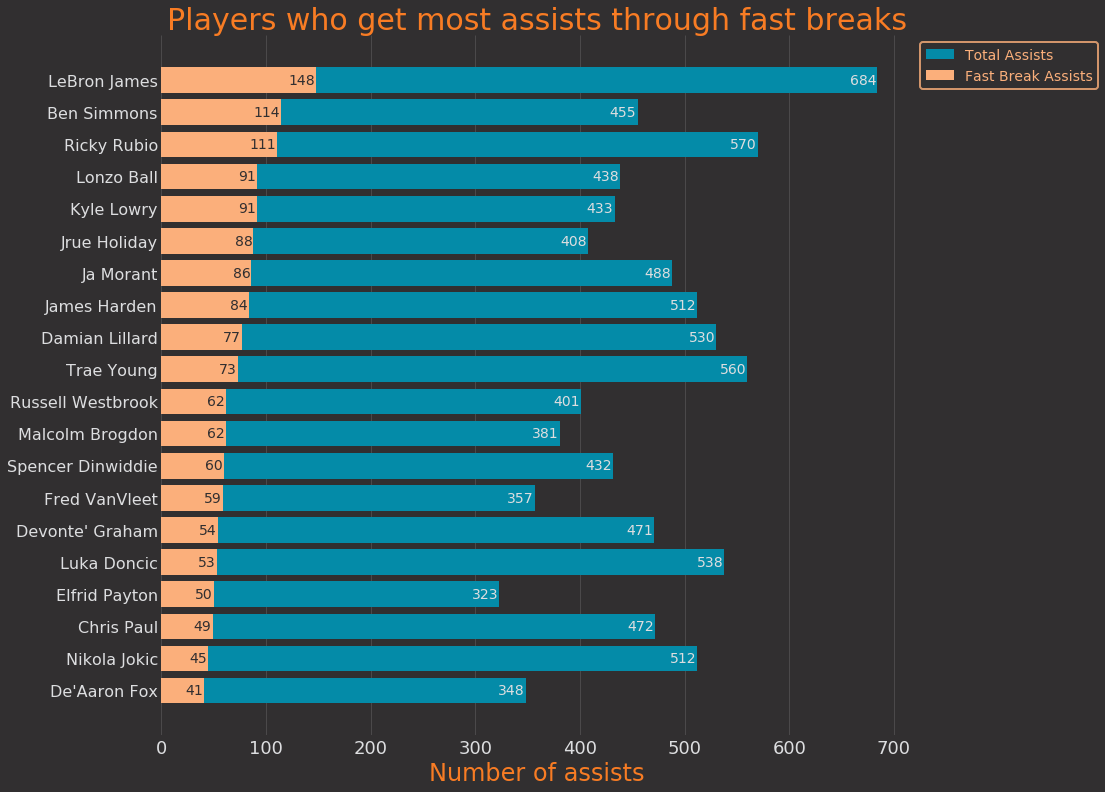

In [35]:
fig, ax = plt.subplots(figsize=(12, 12))


ax.barh(y=assist_df.PLAYER_NAME, width=assist_df.AST.tolist(), color=second_color, label='Total Assists')
ax.barh(y=assist_df.PLAYER_NAME, width=assist_df.FB_AST.tolist(), color=bball_light_orange, label='Fast Break Assists')
ax.set_title('Players who get most assists through fast breaks',  color=bball_orange, size=30)
ax.set_xlabel("Number of assists", color=bball_orange, size=24)
for i in range(len(assist_df)):
    item = assist_df.iloc[i]
    ax.text(x=item.FB_AST - 1, y=i, s=item.FB_AST, ha='right', va='center', color=bball_gray)
    ax.text(x=item.AST - 1, y=i, s=item.AST, ha='right', va='center', color=bball_white)
#ax.set_xticklabels([item for item in ax.get_xticklabels()], size=18)
#ax.set_xticks([tick for tick in range(0, 110, 20)])
#ax.set_xticklabels(f"{item}%" for item in range(0, 105, 20))

#ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

modify_plot(ax, fig)

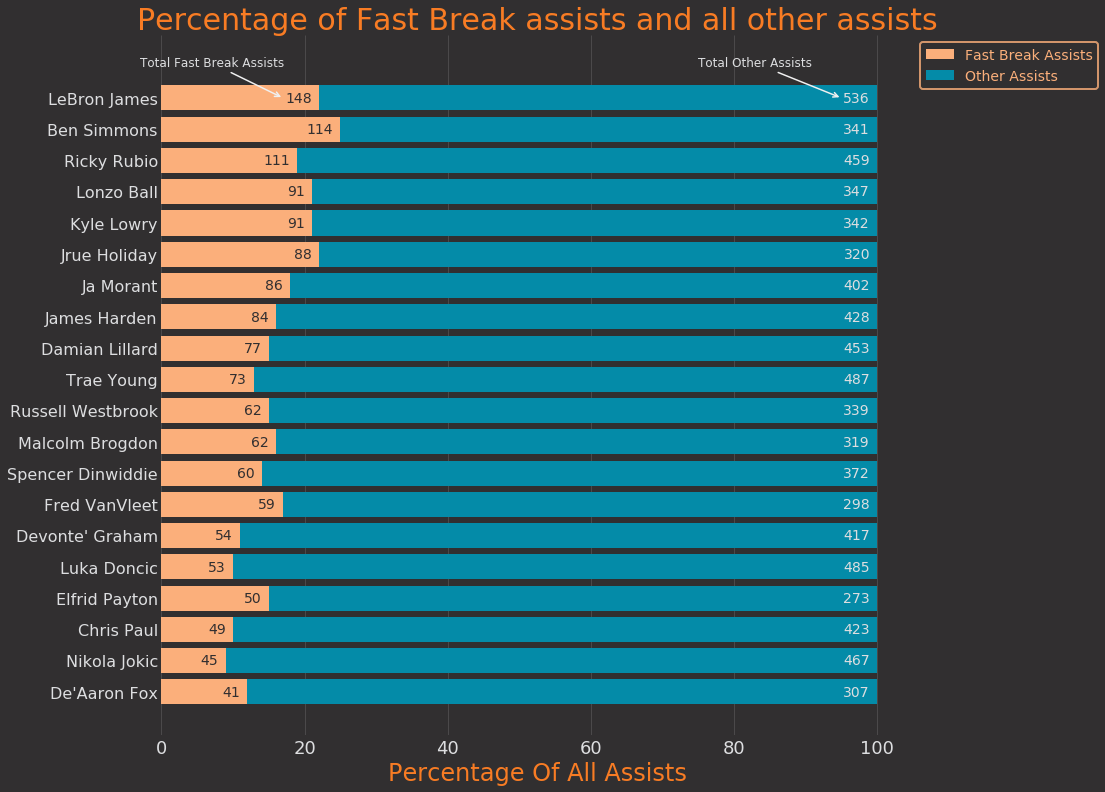

In [36]:
fig, ax = plt.subplots(figsize=(12, 12))


ax.barh(y=assist_df.PLAYER_NAME, width=assist_df.FB_AST_PCT.tolist(), color=bball_light_orange, label='Fast Break Assists')
ax.barh(y=assist_df.PLAYER_NAME, width=assist_df.OTHER_AST_PCT.tolist(), left=assist_df.FB_AST_PCT.tolist(), color=second_color, label='Other Assists')
ax.set_title('Percentage of Fast Break assists and all other assists',  color=bball_orange, size=30)
ax.set_xlabel("Percentage Of All Assists",  color=bball_orange, size=24)
ax.set_yticks([tick for tick in range(-1, len(assist_df)+2, 1)])
#ax.set_xticklabels(f"{item}%" for item in range(0, 105, 20))

for i in range(len(assist_df)):
    item = assist_df.iloc[i]
    ax.text(x=item.FB_AST_PCT - 1, y=i, s=item.FB_AST, ha='right', va='center', color=bball_gray)
    ax.text(x=99, y=i, s=item.AST - item.FB_AST, ha='right', va='center', color=bball_white)

ax.annotate('Total Fast Break Assists', xy=(assist_df.iloc[i].FB_AST_PCT-5, len(assist_df)-1), xytext=(assist_df.iloc[i].FB_AST_PCT-25, len(assist_df)),
            arrowprops=dict(facecolor=bball_white, arrowstyle='->', lw=1.5), color=bball_white, size=12)

ax.annotate('Total Other Assists', xy=(100-5, len(assist_df)-1), xytext=(100-25, len(assist_df)),
            arrowprops=dict(facecolor=bball_white, arrowstyle='->', lw=1.5), color=bball_white, size=12)
    
modify_plot(ax, fig)


### FB Real assists and Total Real Assists

In [37]:
top_passers = top_passers.iloc[:20]

In [38]:
player_assist_info = {}
for i in range(len(top_passers)):
    cur_row = top_passers.iloc[i]
    player_assists = dropped_pbp_df.loc[(dropped_pbp_df.PLAYER2_ID == cur_row.PLAYER_ID) & (dropped_pbp_df.EVENTMSGTYPE == 1)]
    merged_df = pd.merge(left=shots_df, right=player_assists, left_on=("GAME_ID", "GAME_EVENT_ID"), right_on=("GAME_ID_STR", "EVENTNUM"))
    assist_info = Counter()
    value_counts = merged_df.ACTION_TYPE.value_counts().to_dict()
    for key in value_counts:
        if key in created_shots:
            assist_info['created'] += value_counts[key]
        else:
            assist_info['non_created'] += value_counts[key]
    player_assist_info[cur_row.PLAYER_ID] = {
        'PLAYER_NAME': cur_row.PLAYER_NAME,
        'CREATED': assist_info['created'],
        'NON_CREATED': assist_info['non_created'],
        'AST_G': cur_row.AST 
    }
    
created_list = []
real_assists = []
player_names = []
assists_list = []
for player_id in player_assist_info:
    total_assists = player_assist_info[player_id]['CREATED'] + player_assist_info[player_id]['NON_CREATED']
    player_names.append(player_assist_info[player_id]['PLAYER_NAME'])
    created_list.append(round(player_assist_info[player_id]['CREATED']))
    real_assists.append(round(player_assist_info[player_id]['NON_CREATED']))
    assists_list.append(total_assists)

total_assist_df = pd.DataFrame(data={
    'PLAYER_NAME': player_names,
    'FAKE': created_list,
    'REAL': real_assists,
    'AST_G': assists_list
})

In [39]:
total_assists = total_assist_df.loc[:, ['PLAYER_NAME', 'FAKE', 'REAL']]

In [40]:
merged_fb_total = pd.merge(left=assist_df, right=total_assists, on='PLAYER_NAME')

In [41]:
merged_fb_total.loc[:, 'FB_REAL_PCT'] = round((merged_fb_total.FB_REAL / merged_fb_total.REAL) * 100)

In [42]:
merged_fb_total.loc[:, 'REAL_OTHER_PCT'] = 100 - merged_fb_total.FB_REAL_PCT

In [43]:
merged_fb_total.loc[:, 'FB_REAL_PCT_TOTAL'] = (merged_fb_total.FB_REAL / merged_fb_total.AST) * 100
merged_fb_total.loc[:, 'OTHER_REAL_PCT_TOTAL'] = ( (merged_fb_total.REAL - merged_fb_total.FB_REAL) / merged_fb_total.AST) * 100
merged_fb_total.loc[:, 'FAKE_PCT_TOTAL'] = ( merged_fb_total.FAKE / merged_fb_total.AST) * 100

In [44]:
merged_fb_total = merged_fb_total.sort_values(by='FB_AST')

In [45]:
merged_fb_total.loc[:, 'REAL_OTHER'] = merged_fb_total.REAL - merged_fb_total.FB_REAL

In [46]:
third_color = '#F2BEFC'

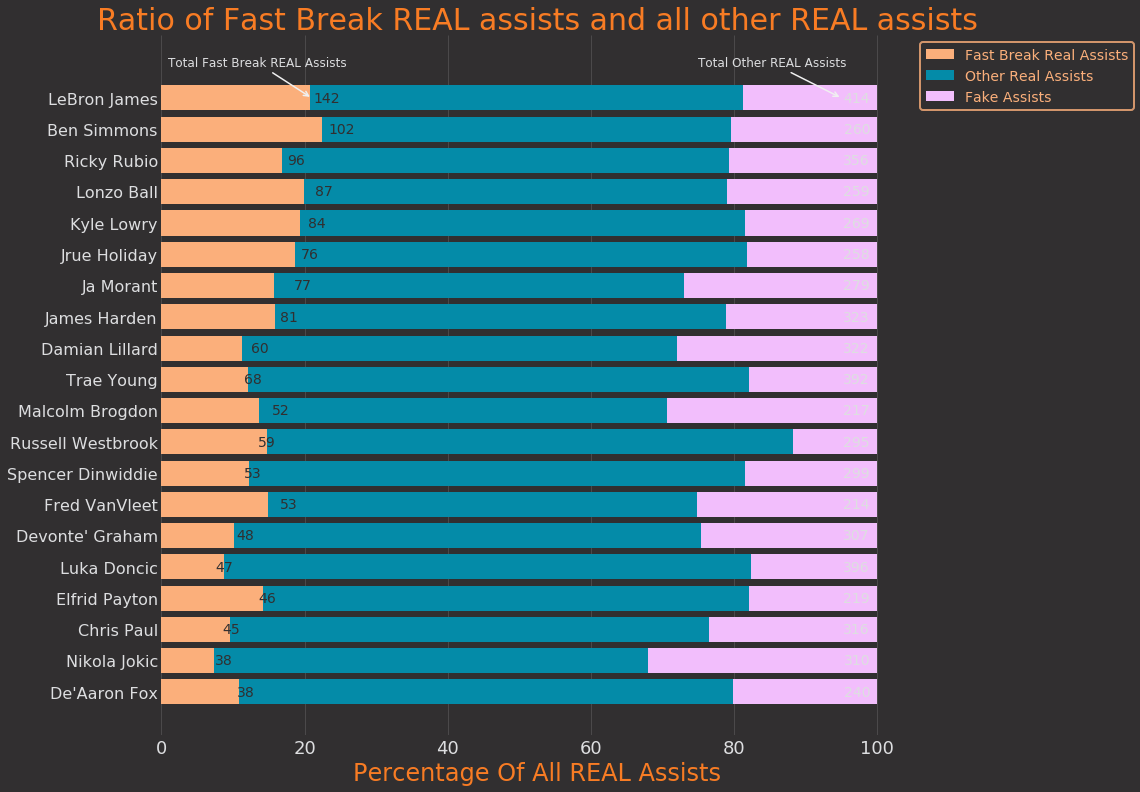

In [47]:
fig, ax = plt.subplots(figsize=(12, 12))


ax.barh(y=merged_fb_total.PLAYER_NAME, width=merged_fb_total.FB_REAL_PCT_TOTAL.tolist(), color=bball_light_orange, label='Fast Break Real Assists')
ax.barh(y=merged_fb_total.PLAYER_NAME, width=merged_fb_total.OTHER_REAL_PCT_TOTAL.tolist(), left=merged_fb_total.FB_REAL_PCT_TOTAL.tolist(), color=second_color, label='Other Real Assists')
ax.barh(y=merged_fb_total.PLAYER_NAME, width=merged_fb_total.FAKE_PCT_TOTAL.tolist(), left=(merged_fb_total.OTHER_REAL_PCT_TOTAL + merged_fb_total.FB_REAL_PCT_TOTAL).tolist(), color=third_color, label='Fake Assists')
ax.set_title('Ratio of Fast Break REAL assists and all other REAL assists',  color=bball_orange, size=30)
ax.set_xlabel("Percentage Of All REAL Assists",  color=bball_orange, size=24)
ax.set_yticks([tick for tick in range(-1, len(merged_fb_total)+2, 1)])
#ax.set_xticklabels(f"{item}%" for item in range(0, 105, 20))

for i in range(len(merged_fb_total)):
    item = merged_fb_total.iloc[i]
    ax.text(x=item.FB_REAL_PCT - 1, y=i, s=item.FB_REAL, ha='right', va='center', color=bball_gray)
    ax.text(x=99, y=i, s=item.REAL - item.FB_REAL, ha='right', va='center', color=bball_white)
    
#ax.text(x=105, y=len(merged_fb_total) - 2, s="REAL AST FB%:  142 / (142 + 414)")

ax.annotate('Total Fast Break REAL Assists', xy=(merged_fb_total.iloc[i].FB_REAL_PCT-5, len(merged_fb_total)-1), xytext=(merged_fb_total.iloc[i].FB_REAL_PCT-25, len(merged_fb_total)),
            arrowprops=dict(facecolor=bball_white, arrowstyle='->', lw=1.5), color=bball_white, size=12)

ax.annotate('Total Other REAL Assists', xy=(100-5, len(merged_fb_total)-1), xytext=(100-25, len(merged_fb_total)),
            arrowprops=dict(facecolor=bball_white, arrowstyle='->', lw=1.5), color=bball_white, size=12)
    
modify_plot(ax, fig)


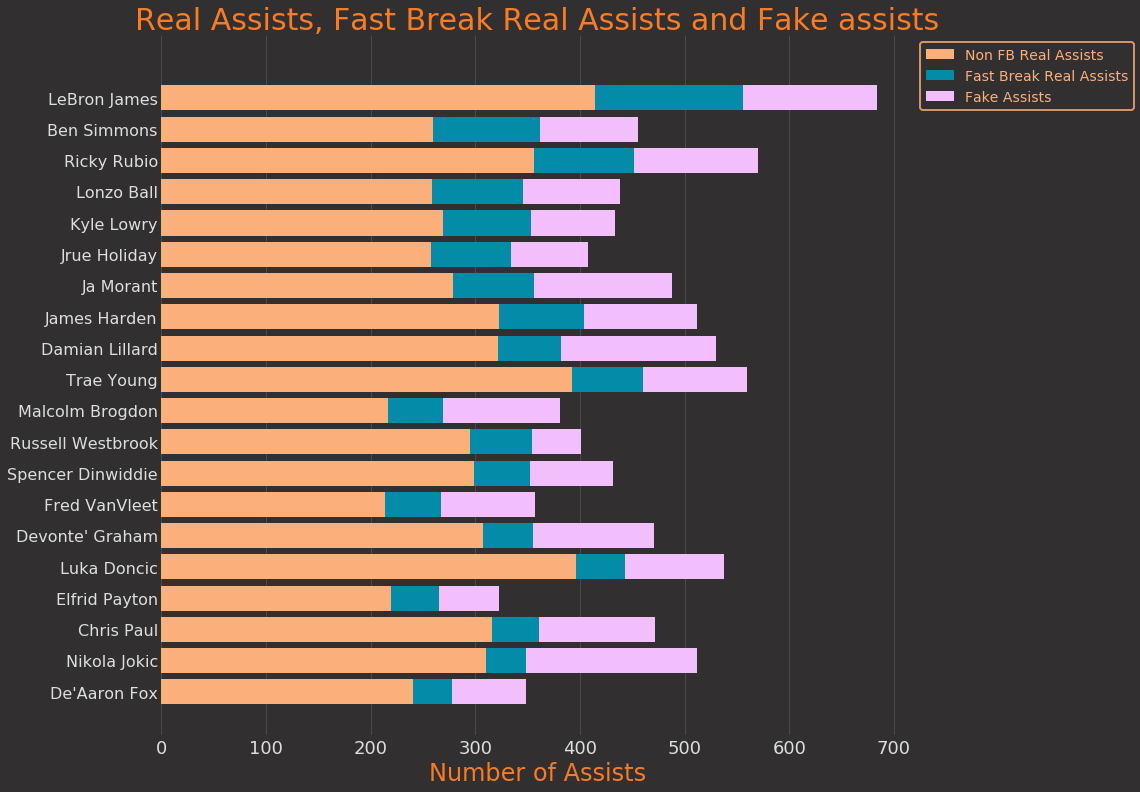

In [49]:
fig, ax = plt.subplots(figsize=(12, 12))


ax.barh(y=merged_fb_total.PLAYER_NAME, width=merged_fb_total.REAL_OTHER.tolist(), color=bball_light_orange, label='Non FB Real Assists')
ax.barh(y=merged_fb_total.PLAYER_NAME, width=merged_fb_total.FB_REAL.tolist(), left=merged_fb_total.REAL_OTHER.tolist(), color=second_color, label='Fast Break Real Assists')
ax.barh(y=merged_fb_total.PLAYER_NAME, width=merged_fb_total.FAKE.tolist(), left=(merged_fb_total.REAL_OTHER + merged_fb_total.FB_REAL).tolist(), color=third_color, label='Fake Assists')
ax.set_title('Real Assists, Fast Break Real Assists and Fake assists',  color=bball_orange, size=30)
ax.set_xlabel("Number of Assists",  color=bball_orange, size=24)
ax.set_yticks([tick for tick in range(-1, len(merged_fb_total)+2, 1)])
#ax.set_xticklabels(f"{item}%" for item in range(0, 105, 20))

"""
for i in range(len(merged_fb_total)):
    item = merged_fb_total.iloc[i]
    ax.text(x=item.FB_REAL_PCT - 1, y=i, s=item.FB_REAL, ha='right', va='center', color=bball_gray)
    ax.text(x=99, y=i, s=item.REAL - item.FB_REAL, ha='right', va='center', color=bball_white)
"""   

#ax.text(x=105, y=len(merged_fb_total) - 2, s="REAL AST FB%:  142 / (142 + 414)")

#ax.annotate('Total Fast Break REAL Assists', xy=(merged_fb_total.iloc[i].FB_REAL_PCT-5, len(merged_fb_total)-1), xytext=(merged_fb_total.iloc[i].FB_REAL_PCT-25, len(merged_fb_total)),
#            arrowprops=dict(facecolor=bball_white, arrowstyle='->', lw=1.5), color=bball_white, size=12)

#ax.annotate('Total Other REAL Assists', xy=(100-5, len(merged_fb_total)-1), xytext=(100-25, len(merged_fb_total)),
#            arrowprops=dict(facecolor=bball_white, arrowstyle='->', lw=1.5), color=bball_white, size=12)
    
modify_plot(ax, fig)


## 3 Pointers assisted

In [7]:
player_assists = dropped_pbp_df.loc[(dropped_pbp_df.PLAYER2_NAME == "Ben Simmons") & (dropped_pbp_df.EVENTMSGTYPE == 1)]

In [15]:
top_passers = league_df.loc[league_df.GP > 30].sort_values(by='AST_RANK').iloc[:80]

In [24]:
shots_df.SHOT_TYPE

0         2PT Field Goal
1         2PT Field Goal
2         2PT Field Goal
3         2PT Field Goal
4         3PT Field Goal
               ...      
188111    2PT Field Goal
188112    3PT Field Goal
188113    2PT Field Goal
188114    3PT Field Goal
188115    2PT Field Goal
Name: SHOT_TYPE, Length: 188116, dtype: object

In [16]:
player_assist_info = {}
for i in range(len(top_passers)):
    cur_row = top_passers.iloc[i]
    player_assists = dropped_pbp_df.loc[(dropped_pbp_df.PLAYER2_ID == cur_row.PLAYER_ID) & (dropped_pbp_df.EVENTMSGTYPE == 1)]
    merged_df = pd.merge(left=shots_df, right=player_assists, left_on=("GAME_ID", "GAME_EVENT_ID"), right_on=("GAME_ID_STR", "EVENTNUM"))
    assist_info = Counter()
    value_counts = merged_df.SHOT_TYPE.value_counts().to_dict()
    
    player_assist_info[cur_row.PLAYER_ID] = {
        'PLAYER_NAME': cur_row.PLAYER_NAME,
        '3_PT': value_counts['3PT Field Goal'],
        '2_PT': value_counts['2PT Field Goal'],
        'AST_G': cur_row.AST 
    }

In [17]:
three_assists = []
two_assists = []
player_names = []
total_threes = []
total_twos = []
assists_list = []
for player_id in player_assist_info:
    total_assists = player_assist_info[player_id]['3_PT'] + player_assist_info[player_id]['2_PT']
    player_names.append(player_assist_info[player_id]['PLAYER_NAME'])
    total_threes.append(player_assist_info[player_id]['3_PT'])
    total_twos.append(player_assist_info[player_id]['2_PT'])
    three_assists.append(round(player_assist_info[player_id]['3_PT'] / total_assists * 100))
    two_assists.append(round(player_assist_info[player_id]['2_PT'] / total_assists * 100))
    assists_list.append(total_assists)

In [18]:
assist_df = pd.DataFrame(data={
    'PLAYER_NAME': player_names,
    '3_PT': three_assists,
    '2_PT': two_assists,
    '3_TOTAL': total_threes,
    '2_TOTAL': total_twos,
    'AST_G': assists_list
})

In [19]:
assist_df

,PLAYER_NAME,3_PT,2_PT,3_TOTAL,2_TOTAL,AST_G
0,LeBron James,34,66,234,450,684
1,Trae Young,31,69,172,388,560
2,Luka Doncic,45,55,244,294,538
3,Ricky Rubio,28,72,160,410,570
4,Damian Lillard,39,61,206,324,530
5,Ben Simmons,50,50,226,229,455
6,James Harden,39,61,202,310,512
7,Devonte' Graham,32,68,151,320,471
8,Kyle Lowry,30,70,131,302,433
9,Ja Morant,38,62,185,303,488


In [79]:
assist_df = assist_df.iloc[:20]

In [82]:
assist_df = assist_df.sort_index(ascending=False)

In [66]:
plt.style.use('fivethirtyeight')

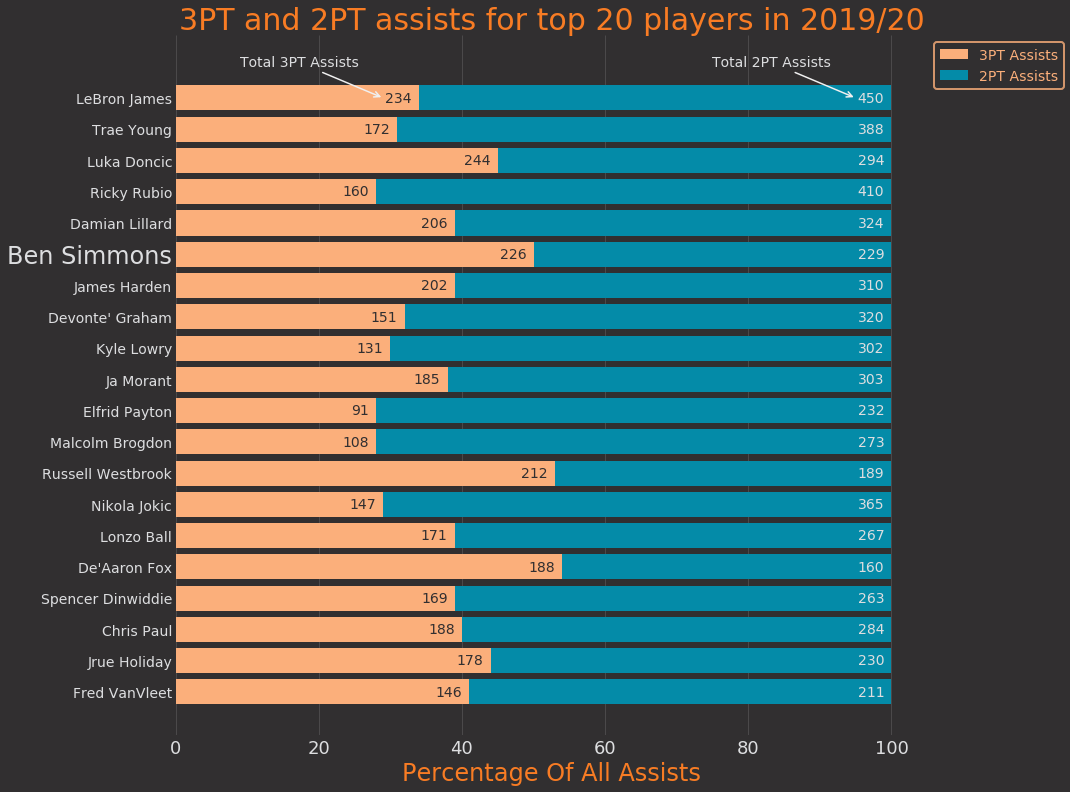

In [92]:
fig, ax = plt.subplots(figsize=(12, 12))


ax.barh(y=assist_df.PLAYER_NAME, width=assist_df['3_PT'].tolist(), color=bball_light_orange, label='3PT Assists')
ax.barh(y=assist_df.PLAYER_NAME, width=assist_df['2_PT'].tolist(), left=assist_df['3_PT'].tolist(), color=second_color, label='2PT Assists')
ax.set_title('3PT and 2PT assists for top 20 players in 2019/20',  color=bball_orange, size=30)
ax.set_xlabel("Percentage Of All Assists",  color=bball_orange, size=24)
ax.set_yticks([tick for tick in range(-1, len(assist_df)+2, 1)])
#ax.set_xticklabels(f"{item}%" for item in range(0, 105, 20))

for i in range(len(assist_df)):
    item = assist_df.iloc[i]
    ax.text(x=item['3_PT'] - 1, y=i, s=item['3_TOTAL'], ha='right', va='center', color=bball_gray)
    ax.text(x=99, y=i, s=item['2_TOTAL'], ha='right', va='center', color=bball_white)
    

ax.annotate('Total 3PT Assists', xy=(assist_df.iloc[i]['3_PT']-5, len(assist_df)-1), xytext=(assist_df.iloc[i]['3_PT']-25, len(assist_df)),
            arrowprops=dict(facecolor=bball_white, arrowstyle='->', lw=1.5), color=bball_white, size=14)

ax.annotate('Total 2PT Assists', xy=(100-5, len(assist_df)-1), xytext=(100-25, len(assist_df)),
            arrowprops=dict(facecolor=bball_white, arrowstyle='->', lw=1.5), color=bball_white, size=14)
    
modify_plot(ax, fig)
ticks = ax.get_yticklabels()
for index, tick in enumerate(ticks):
    if index == 15:
        tick.set_size(24)



### VIDEO URL

In [37]:
url = "https://stats.nba.com/stats/videodetailsasset?AheadBehind=&CFID=33&CFPARAMS=2019-20&ClutchTime=&Conference=&ContextFilter=&ContextMeasure=AST&DateFrom=&DateTo=&Division=&EndPeriod=10&EndRange=28800&GROUP_ID=&GameEventID=&GameID=&GameSegment=&GroupID=&GroupMode=&GroupQuantity=5&LastNGames=0&LeagueID=00&Location=&Month=0&OnOff=&OpponentTeamID=0&Outcome=&PORound=0&Period=0&PlayerID=1627732&PlayerID1=&PlayerID2=&PlayerID3=&PlayerID4=&PlayerID5=&PlayerPosition=&PointDiff=&Position=&RangeType=0&RookieYear=&Season=2019-20&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StartPeriod=1&StartRange=0&StarterBench=&TeamID=0&VsConference=&VsDivision=&VsPlayerID1=&VsPlayerID2=&VsPlayerID3=&VsPlayerID4=&VsPlayerID5=&VsTeamID="

In [38]:
import requests

In [39]:
headers= {
    'Host': 'stats.nba.com', 
    'Connection': 'keep-alive', 
    'Accept': 'application/json, text/plain, */*', 
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.97 Safari/537.36', 
    'Referer': 'https://stats.nba.com/', 
    'Accept-Encoding': 'gzip, deflate, br', 
    'Accept-Language': 'en-US,en;q=0.9',
    'x-nba-stats-origin': 'stats',
    'x-nba-stats-token': 'true',
}

In [40]:
response = requests.get(url, headers=headers)

In [41]:
json_data = response.json()

In [45]:
two_pt = 0
three_pt = 0
for item in json_data['resultSets']['playlist']:
    if '3PT' in item['dsc']:
        three_pt += 1
    else:
        two_pt += 1

In [46]:
two_pt

229

In [47]:
three_pt

226

### Ben Simmons 2019-20

3pt: 226

2pt 229

##### 2017-18

In [48]:
url_2 = "https://stats.nba.com/stats/videodetailsasset?AheadBehind=&CFID=33&CFPARAMS=2017-18&ClutchTime=&Conference=&ContextFilter=&ContextMeasure=AST&DateFrom=&DateTo=&Division=&EndPeriod=10&EndRange=28800&GROUP_ID=&GameEventID=&GameID=&GameSegment=&GroupID=&GroupMode=&GroupQuantity=5&LastNGames=0&LeagueID=00&Location=&Month=0&OnOff=&OpponentTeamID=0&Outcome=&PORound=0&Period=0&PlayerID=1627732&PlayerID1=&PlayerID2=&PlayerID3=&PlayerID4=&PlayerID5=&PlayerPosition=&PointDiff=&Position=&RangeType=0&RookieYear=&Season=2017-18&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StartPeriod=1&StartRange=0&StarterBench=&TeamID=0&VsConference=&VsDivision=&VsPlayerID1=&VsPlayerID2=&VsPlayerID3=&VsPlayerID4=&VsPlayerID5=&VsTeamID="

In [51]:
response = requests.get(url_2, headers=headers)

json_data = response.json()

two_pt = 0
three_pt = 0
for item in json_data['resultSets']['playlist']:
    if '3PT' in item['dsc']:
        three_pt += 1
    else:
        two_pt += 1

In [52]:
two_pt

359

In [53]:
three_pt

302

### Ben Simmons 2017-18

3pt: 302

2pt: 359

##### 2018-19

In [54]:
url_3 = "https://stats.nba.com/stats/videodetailsasset?AheadBehind=&CFID=33&CFPARAMS=2018-19&ClutchTime=&Conference=&ContextFilter=&ContextMeasure=AST&DateFrom=&DateTo=&Division=&EndPeriod=10&EndRange=28800&GROUP_ID=&GameEventID=&GameID=&GameSegment=&GroupID=&GroupMode=&GroupQuantity=5&LastNGames=0&LeagueID=00&Location=&Month=0&OnOff=&OpponentTeamID=0&Outcome=&PORound=0&Period=0&PlayerID=1627732&PlayerID1=&PlayerID2=&PlayerID3=&PlayerID4=&PlayerID5=&PlayerPosition=&PointDiff=&Position=&RangeType=0&RookieYear=&Season=2018-19&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StartPeriod=1&StartRange=0&StarterBench=&TeamID=0&VsConference=&VsDivision=&VsPlayerID1=&VsPlayerID2=&VsPlayerID3=&VsPlayerID4=&VsPlayerID5=&VsTeamID="

In [59]:
response = requests.get(url_3, headers=headers)

json_data = response.json()

two_pt = 0
three_pt = 0
for item in json_data['resultSets']['playlist']:
    if '3PT' in item['dsc']:
        three_pt += 1
    else:
        two_pt += 1


In [60]:
two_pt

350

In [61]:
three_pt

260

#### Ben Simmons 2018-19

3pt: 260

2pt: 350